In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../kofio_dataset/kofio_dataset.csv',sep='\t')

## Insight on our dataset

In [3]:
df.head(20)

,Item Name,Roastery,Roast Level,Region,Flavour Profile,Roast Type,Process,Variety,Brewing Method,Coffee Origin,Rating,Recommended,Price
0,Ethiopia Jenny's BARREL COFFEE - maturing in w...,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni (recommended for both Filter & Espresso C...,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.5,96%,"14,99"
1,Rwanda KIRAMBO,The naughty dog,Omni,Nyamasheke District,"Milk chocolate,Blueberries,Mulled wine,Lemon m...",Omni (recommended for both Filter & Espresso C...,Natural,Red Bourbon,"Aeropress,Chemex,Clever dripper,French Press,H...",Rwanda,4.4,100%,"11,99"
2,Ethiopia SUKE QUTO - washed 1000g,The naughty dog,Light to Medium Light,Guji,"Bergamot,Peach ice tea,Black tea,Flowers",Filter,Washed,Heirloom,"Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,NaN,NaN,"49,99"
3,Ethiopia Jenny's BARREL COFFEE - 1000g,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni (recommended for both Filter & Espresso C...,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.5,96%,"54,99"
4,Ethiopia GORAA,The naughty dog,Light to Medium Light,Guji,"Peach tea,Květinový med,Milk chocolate",Filter,Natural,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,NaN,NaN,"11,99"
5,Ethiopia MALAWO - black honey,The naughty dog,Light to Medium Light,Bensa,"Peach ice tea,Jasmine,Forest strawberries,Pass...",Filter,Honey,Heirloom,"Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,5.0,100%,"12,99"
6,Kenya NGANDU,The naughty dog,Light to Medium Light,Nyeri,"Redcurrant,Maple syrup,Lime",Filter,Washed,"SL28,SL34","Aeropress,Chemex,Clever dripper,French Press,H...",Kenya,5.0,100%,"11,99"
7,Colombia BOLIVAR,The naughty dog,Light to Medium Light,Antioquia,"Caramel,Forest fruit,Rum",Filter,Natural,"Castillo,Caturra","Aeropress,Chemex,Clever dripper,French Press,H...",Colombia,4.7,100%,"11,99"
8,Ethiopia GENJI CHALLA,The naughty dog,Light to Medium Light,Jimma - Oromia,"Bergamot,Black tea,Nectarines,Orange",Filter,Washed,Heirloom,"Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.3,50%,"11,99"
9,UNICORN BLEND #5,The naughty dog,Light to Medium Light,NaN,"Black tea,Květinový med,Apricots,Vanilla,Jelly",Filter,NaN,"Castillo,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...","Ethiopia,Colombia",NaN,NaN,"13,99"


In [4]:
print(df.count())
# count the number of non-empty values for each column
print("\nItems without NULL value:",df.dropna().count()[0])
# count the number of rows that have no empty values

Item Name          322
Roastery           322
Roast Level        283
Region             309
Flavour Profile    320
Roast Type         283
Process            301
Variety            241
Brewing Method     283
Coffee Origin      320
Rating             111
Recommended        111
Price              179
dtype: int64

Items without NULL value: 53


In [16]:
selected_columns = [['Rating', 'Recommended', 'Price'], ['Roast Level', 'Brewing Method', 'Flavour Profile']]
print(df[selected_columns[0]].count()[0])
# count the number of rows that have non-empty values in selected columns 
print(df[selected_columns[1]].count()[0])
print(df[selected_columns[0] + selected_columns[1]].count()[0])

111
283
111


## Data Cleaning

In [28]:
# Change the type of Price/Recommended to float/int
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Recommended'] = df['Recommended'].str.replace('%', '').astype(int)

In [29]:
# Data with prices, ratings and recommended
df_fig2 = df
df_fig2.dropna(subset=['Price','Rating','Recommended'], inplace=True)
df_fig2

,Item Name,Roastery,Roast Level,Region,Flavour Profile,Roast Type,Process,Variety,Brewing Method,Coffee Origin,Rating,Recommended,Price
0,Ethiopia Jenny's BARREL COFFEE - maturing in w...,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni (recommended for both Filter & Espresso C...,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.5,96,14.99
1,Rwanda KIRAMBO,The naughty dog,Omni,Nyamasheke District,"Milk chocolate,Blueberries,Mulled wine,Lemon m...",Omni (recommended for both Filter & Espresso C...,Natural,Red Bourbon,"Aeropress,Chemex,Clever dripper,French Press,H...",Rwanda,4.4,100,11.99
3,Ethiopia Jenny's BARREL COFFEE - 1000g,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni (recommended for both Filter & Espresso C...,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.5,96,54.99
5,Ethiopia MALAWO - black honey,The naughty dog,Light to Medium Light,Bensa,"Peach ice tea,Jasmine,Forest strawberries,Pass...",Filter,Honey,Heirloom,"Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,5.0,100,12.99
6,Kenya NGANDU,The naughty dog,Light to Medium Light,Nyeri,"Redcurrant,Maple syrup,Lime",Filter,Washed,"SL28,SL34","Aeropress,Chemex,Clever dripper,French Press,H...",Kenya,5.0,100,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Start capsules for nespresso coffee machines -...,Doubleshot,NaN,Guatemala - Ayarza lake,"Caramel,Milk chocolate,Hazelnuts",NaN,NaN,"Catuai,Bourbon",,"Guatemala,Brazil",5.0,100,7.49
211,FIFTY ESPRESSO blend,Fiftybeans,Medium to medium dark,Bálsamo - Quezaltepec,"Dark Bitter chocolate,Dutch cocoa,Cocoa nibs",Espresso,NaN,"Catuai,Castillo","Espresso,Moka pot","Colombia,Brazil",4.8,100,11.99
212,BLØND FILTER blend,Fiftybeans,Light to Medium Light,Mixteca,"Nougat,Cocoa,Nuts,Citrus",Filter,NaN,"Catuai,Typical,Bourbon","Aeropress,Chemex,Clever dripper,French Press,H...","Colombia,Mexico",4.3,100,11.99
213,FIFTY ESPRESSO blend - 1000g,Fiftybeans,Medium to medium dark,Bálsamo - Quezaltepec,"Dark Bitter chocolate,Dutch cocoa,Cocoa nibs",Espresso,Washed,"Catuai,Castillo","Espresso,Moka pot","Colombia,Brazil",4.8,100,34.99


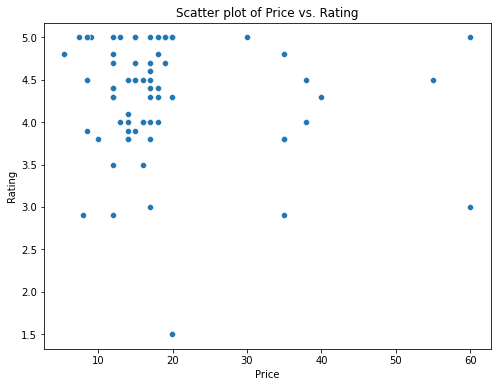

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Rating', data=df_fig2)
plt.title('Scatter plot of Price vs. Rating')
plt.show()

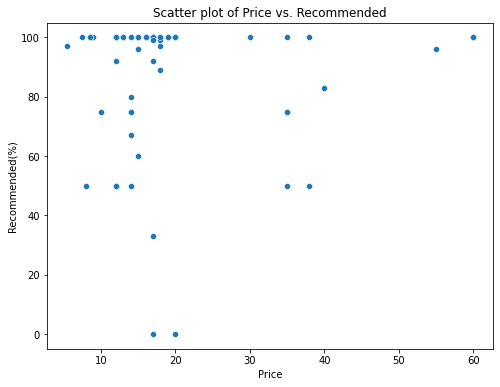

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Recommended', data=df_fig2)
plt.title('Scatter plot of Price vs. Recommended')
plt.ylabel('Recommended(%)')
plt.show()

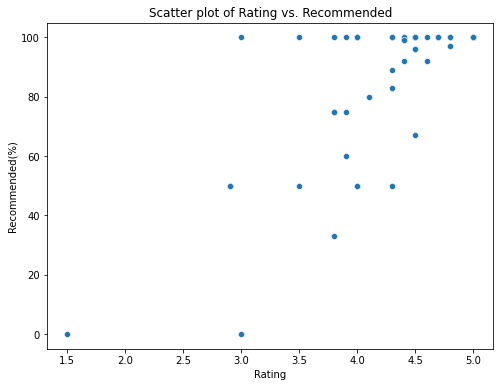

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Recommended', data=df_fig2)
plt.title('Scatter plot of Rating vs. Recommended')
plt.ylabel('Recommended(%)')
plt.show()

In [ ]:
df_fig2.to_csv('../kofio_dataset/price_rating_rec_clean.csv',index=False)

In [9]:
df['Flavour Profile'] = df['Flavour Profile'].fillna('')
flavour_lists=df['Flavour Profile'].str.split(',').tolist()
flavours = list(set([flavour for flavour_list in flavour_lists for flavour in flavour_list]))[1:]
flavours


['Cheesecake',
 'Strawberries',
 'Lískooříškový krém',
 'Nectarines',
 'Cocoa nibs',
 'Apple blossom',
 'Hip',
 'Orange peel',
 'Red orange',
 'Rum',
 'Light acidity',
 'Red wine',
 'Sugarcane',
 'Mojito',
 'Yoghurt',
 'Sweetness',
 'Kiwi',
 'Roasted nuts',
 'Black tea with lemon',
 'Oolong',
 'Cherry compote',
 'Apricots',
 'Cream body',
 'Orange jam',
 'Ripe cherries',
 'Green apple',
 'Apple',
 'Hibiscus',
 'Roses',
 'Exotic fruit',
 'Ovesné sušenky',
 'Plum jam',
 'Berry fruits',
 'Marzipan',
 'Yuzu',
 'Marshmallow',
 'Cookies',
 'Pear',
 'Elderberries',
 'Almond',
 'Candies',
 'Black tea',
 'Chocolate brownie',
 'Eggnog',
 'White peaches',
 'Plums',
 'Elderflower',
 'Dates',
 'Cherry jam',
 'Dark chocolate',
 'Fruit',
 'Poached pear',
 'Tangerines',
 'Nuts',
 'Peach ice tea',
 'Chocolate mousse',
 'Yellow plums',
 'Cherry tomatoes',
 'Lemon grass',
 'Red berry fruit',
 'Pineapple drink',
 'Redcurrant',
 'Orange flower',
 'Dried dates',
 'Dried apricots',
 'Cashew',
 'Dried strawbe

In [11]:
df['Brewing Method'] = df['Brewing Method'].fillna('')
flavour_lists=df['Brewing Method'].str.split(',').tolist()
methods = list(set([flavour for flavour_list in flavour_lists for flavour in flavour_list]))[1:]
methods

['Espresso',
 'Chemex',
 'Moka pot',
 'Clever dripper',
 'French Press',
 'Vacuum Pot',
 'Hario V60',
 'Aeropress']

'Aeropress,Chemex,Clever dripper,French Press,Hario V60,Moka pot,Vacuum Pot,Espresso'